(dl/01a-fcnn)=
# Fully-connected NNs (MLPs)

**Fully-connected networks** consist of a sequence of **dense** layers followed by an [activation function](https://en.wikipedia.org/wiki/Activation_function). A dense layer consist of neurons which compute
$\mathsf{y}_k = \varphi(\boldsymbol{\mathsf{x}} \cdot \boldsymbol{\mathsf{w}}_k + b_k)$
for $k = 1, \ldots, H$ where the activation $\varphi\colon \mathbb{R} \to \mathbb{R}$ is a nonlinear function. The number of neurons $H$ is called the **width** of the layer. The number of layers in a network is called its **depth**. Fully-connected networks are also historically known as [multilayer perceptrons](https://en.wikipedia.org/wiki/Perceptron) (MLPs).

This can be written in terms of matrix multiplication: $\boldsymbol{\mathsf{X}}^1 = \varphi\left(\boldsymbol{\mathsf{X}}^0\,\boldsymbol{\mathsf{W}} + \boldsymbol{\mathsf{b}}\right)$ where $B$ data points in $\mathbb{R}^d$ are stacked so that the input $\boldsymbol{\mathsf{X}}^0$ has shape $(B, d)$ allowing the network to process data in parallel. The layer output is then passed as input to the next layer. 

```{figure} ../../../img/nn/artificial-neuron.png
---
name: artificial-neuron
width: 80%
---
An artificial neuron is a simplistic mathematical model for the biological neuron. Biological neurons are believed to remain inactive until the net input to the cell body (soma) reaches a certain threshold, at which point the neuron gets *activated* and fires an electro-chemical signal. [Source](https://jermwatt.github.io/machine_learning_refined/notes/13_Multilayer_perceptrons/13_2_Multi_layer_perceptrons.html) 
```


It turns out that fully-connected neural networks can approximate any continuous function $f$ from a closed and bounded set $K \subset \mathbb{R}^d$ to $\mathbb{R}^m.$ This is a reasonable assumption about a ground truth function which we assume to exist.  The following approximates a one-dimensional curve using a neural network with [ReLU activation](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)): $z \mapsto \max(0, z)$ for $z \in \mathbb{R}.$

In [1]:
import torch

# Ground truth
x = torch.linspace(-2*torch.pi, 2*torch.pi, 1000)
y = torch.sin(x) + 0.3 * x

# Get (sorted) sample
B = torch.randint(0, 1000, size=(24,))
B = torch.sort(B)[0]
xs = x[B]
ys = y[B]

# ReLU approximation
z = torch.zeros(1000,)
for i in range(len(xs) - 1):
    if torch.isclose(xs[i + 1], xs[i]):
        m = torch.tensor(0.0)
    else:
        M = (ys[i+1] - ys[i]) / (xs[i+1] - xs[i])
        s, m = torch.sign(M), torch.abs(M)
    z += s * (torch.relu(m * (x - xs[i])) - torch.relu(m * (x - xs[i+1])))
z += ys[0]

Note that this only works for target function with compact domain `[a, b]`.

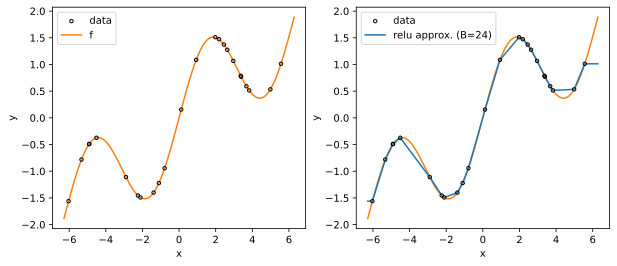

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].scatter(xs, ys, facecolor='none', s=12, edgecolor='k', zorder=3, label='data')
ax[0].plot(x, y, color="C1", label='f')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend();

ax[1].scatter(xs, ys, facecolor='none', s=12, edgecolor='k', zorder=4, label='data')
ax[1].plot(x, z, color="C0", label=f'relu approx. (B={len(B)})', zorder=3)
ax[1].plot(x, y, color="C1")
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].legend();

This works by constructing step-like functions `___/‾‾‾` and `‾‾‾\___`  but with slope in between adjacent points. The functions increment each other starting with the constant function `ys[0]`. Note this correctly ends with a constant function `ys[-1]`.